In [2]:
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# Forward (Pixels)

In [3]:
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0.1,mean_coeff = 10, covar_coeff=10)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/soft_fwd")

torch.save(net,save_dir+"/soft_fwd.net")



# what follows is code to visualize the representations
# d = 5 # must match the final entry in layers
# n_samps = 500
# env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
# X = np.empty((n_samps,d))
# for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
#     X[i,:] = env.reset(state=[ang,0])
# utils.visualize_trajectory(X)


/home/holdenlee/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


KeyboardInterrupt: 

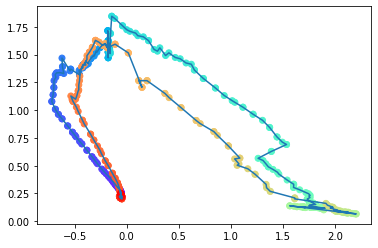

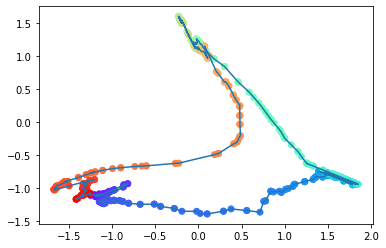

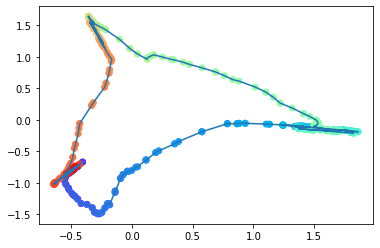

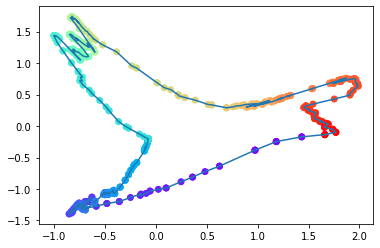

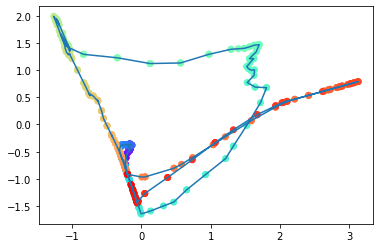

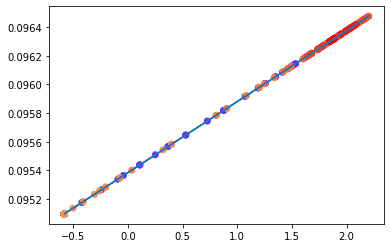

In [9]:
d=3
n_samps=500
for al in range(-4,5):
    r = 2.0**al
    n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
    env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


    #nonlin = torch.nn.ELU()
    nonlin = torch.nn.functional.relu
    layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
    save_dir = "./"
    n_episodes = 1000 # total batches to draw
    batch_size = 64
    learning_rate = .001
    save_every = int(n_episodes/4) # save the model every so often
    encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
    mixnet = srt.SoftmaxNet([3,6])
    prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0,mean_coeff = r, covar_coeff=1)
    deterministic_args = None 

    traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

    net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/soft_fwd_tests")
    wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
    X = np.empty((n_samps,d))
    for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
        X[i,:] = wenv.reset(state=[ang,0])
        #env.render()
    plt.figure()
    xhat = utils.visualize_trajectory(X)
    

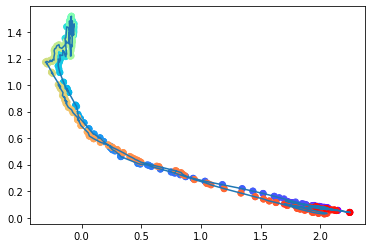

In [18]:
# specify environment information
n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0.005,mean_coeff = 2**-3, covar_coeff=1)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/soft_fwd_all")

torch.save(net,save_dir+"/soft_fwd_all.net")

#what follows is code to visualize the representations
d = 3 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
_ = utils.visualize_trajectory(X)


In [3]:
net = torch.load(save_dir+"/soft_fwd.net")
n_episodes = 100
for i in range(10):
    # schedule of temps
    prednet.alpha=1
    prednet.covar_coeff=1
    net, losses = srt.train_encoder(net,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/soft_fwd")
torch.save(net,save_dir+"/soft_fwd_2.net")

# Forward + Reward (Pixels)

In [11]:
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/2) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

# 2*state dim+action dim
rnet = srt.EncoderNet([2*3+1, 50, 10, 1])

#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,fit_reward=True,mu=1, r_encoder = rnet,alpha=0, mean_coeff = 0, covar_coeff=1)
deterministic_args = None 
# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args,
                                          output_rewards=True)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/soft_fwd_rew")

torch.save(net,save_dir+"/soft_fwd_rew.net")

# what follows is code to visualize the representations
# = 5 # must match the final entry in layers
#_samps = 500
#nv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
# = np.empty((n_samps,d))
#or i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
#   X[i,:] = env.reset(state=[ang,0])
#tils.visualize_trajectory(X)


# Rewards (only)

In [4]:
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 5] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 25
learning_rate = .001
save_every = int(n_episodes/2) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

# 2*state dim+action dim
rnet = srt.EncoderNet([2*5+1, 50, 10, 1])

#prednet = srt.ForwardNet(encnet,layers[-1],1)
prednet = srt.PiecewiseForwardNet(encnet,layers[-1],1,2,fit_reward=True,mu=1, r_encoder = rnet,alpha=1)
deterministic_args = None 



traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args,
                                          output_rewards=True)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/rew")

torch.save(net,save_dir+"/rew.net")

# what follows is code to visualize the representations
# = 5 # must match the final entry in layers
#_samps = 500
#nv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
# = np.empty((n_samps,d))
#or i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
#   X[i,:] = env.reset(state=[ang,0])
#tils.visualize_trajectory(X)


In [16]:
2**-3

0.125